In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from scipy import stats
import joblib
import warnings
warnings.filterwarnings('ignore')

In [119]:
data = pd.read_csv('/users/ibrahimsulu/PyData/car_price_prediction.csv')

In [120]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [122]:
quantitative_desc = ['Price','Levy','Mileage','Engine volume','Cylinders','Airbags']

In [123]:
data[quantitative_desc].describe()

,Price,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000
mean,1.855593e+04,4.582991,6.582627
std,1.905813e+05,1.199933,4.320168
min,1.000000e+00,1.000000,0.000000
25%,5.331000e+03,4.000000,4.000000
50%,1.317200e+04,4.000000,6.000000
75%,2.207500e+04,4.000000,12.000000
max,2.630750e+07,16.000000,16.000000


In [124]:
## Columns that are not correct type are missing: Levy, Mileage, Engine Volume

In [125]:
##Fixing Mileage, Change to int and remove km

In [126]:
data['Mileage'] = data['Mileage'].str.strip('km')
data['Mileage'] = data['Mileage'].astype('int64')

In [127]:
for col in data.columns:
    print(col)
    print(data[f'{col}'].unique())

ID
[45654403 44731507 45774419 ... 45804997 45793526 45813273]
Price
[13328 16621  8467 ... 56814 63886 22075]
Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '14

In [128]:
##Fixing Levy, in 3rd row, - is present, which is indicator for null values. It will be removed. First, will see how many rows have it

In [129]:
data['Levy'].replace({'-':np.nan}, inplace = True)
data['Levy'] = data ['Levy'].astype('float64')

In [130]:
data['Engine volume'] = data['Engine volume'].str.upper()

In [131]:
data['Turbo'] = data ['Engine volume'].str.contains('TURBO')

In [132]:
data[data['Turbo'] == False]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,False
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055.0,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,04-May,Left wheel,Grey,12,False
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,False
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,False
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4,False


In [133]:
data['Leather interior'].replace({'Yes': True, 'No':False}, inplace=True)

In [134]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,False
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,False


In [135]:
data['Doors'].replace({'02-Mar':2, '04-May':4, '>5':5}, inplace = True)

In [136]:
data['Engine volume'] = data['Engine volume'].str.slice(0,3)
data['Engine volume'] = data['Engine volume'].astype('float64')

In [137]:
data = data.drop('ID', axis = 1)

In [138]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False


In [139]:
data.describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags
count,1.923700e+04,13418.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,906.838128,2010.912824,2.307990,1.532236e+06,4.582991,3.925872,6.582627
std,1.905813e+05,461.867051,5.668673,0.877805,4.840387e+07,1.199933,0.403399,4.320168
min,1.000000e+00,87.000000,1939.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,5.331000e+03,640.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000,4.000000
50%,1.317200e+04,781.000000,2012.000000,2.000000,1.260000e+05,4.000000,4.000000,6.000000
75%,2.207500e+04,1058.000000,2015.000000,2.500000,1.888880e+05,4.000000,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,5.000000,16.000000


In [140]:
### outlier removal, 3.sd 

In [141]:
np.std(data['Levy'])

461.8498401921454

In [142]:
quant_list = 'Price','Levy','Mileage'

In [143]:
for x in quant_list:
    std = np.std(data[f'{x}'])
    max = np.mean(data[f'{x}']) + 3 * std
    min = np.mean(data[f'{x}']) - 3 * std
    
    print(x, std, max, min)
    display(data[data[f'{x}'] > max])
    deleted_data = data.drop(data[f'{x}'].index,axis=0)

Price 190576.31611155745 590284.875558252 -553173.0211110928


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
1225,627220,NaN,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,True,Petrol,6.3,0,8.0,Tiptronic,4x4,4,Left wheel,Black,12,True
8541,872946,2067.0,LAMBORGHINI,Urus,2019,Universal,True,Petrol,4.0,2531,8.0,Tiptronic,4x4,4,Left wheel,Black,0,False
16983,26307500,NaN,OPEL,Combo,1999,Goods wagon,False,Diesel,1.7,99999,4.0,Manual,Front,2,Left wheel,Blue,0,False


Levy 461.8498401921454 2292.387648464348 -478.71139268852437


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
18,549,2386.0,HYUNDAI,Sonata,2006,Sedan,True,Petrol,3.3,295059,6.0,Automatic,Rear,4,Left wheel,Blue,12,False
26,549,2455.0,LEXUS,GX 470,2008,Jeep,True,Petrol,4.7,0,8.0,Automatic,4x4,4,Left wheel,White,0,False
78,862,2455.0,LEXUS,GX 470,2008,Jeep,True,Petrol,4.7,263190,8.0,Automatic,4x4,4,Left wheel,White,0,False
115,11917,11714.0,MERCEDES-BENZ,E 500 AMG,2003,Sedan,True,Petrol,5.0,150000,12.0,Tiptronic,Rear,4,Right-hand drive,White,12,False
132,549,2866.0,NISSAN,Maxima,2004,Sedan,True,Petrol,3.5,299709,6.0,Automatic,Front,4,Left wheel,Grey,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18854,282,2455.0,LEXUS,GX 470,2008,Jeep,True,Petrol,4.7,218126,8.0,Automatic,4x4,4,Left wheel,Black,0,False
18957,14740,11706.0,MERCEDES-BENZ,E 500 AVG,2005,Sedan,True,Petrol,5.0,56000,12.0,Tiptronic,Rear,4,Right-hand drive,Black,12,False
18963,33,2308.0,HUMMER,H3,2007,Jeep,False,Petrol,3.7,185000,5.0,Tiptronic,4x4,4,Left wheel,Beige,12,True
18984,11917,11714.0,MERCEDES-BENZ,E 500,2003,Sedan,True,Petrol,5.0,150000,12.0,Tiptronic,Rear,4,Right-hand drive,White,12,False


Mileage 48402611.26995811 146740069.49755952 -143675598.12218913


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
985,2700,NaN,OPEL,Vectra,1997,Sedan,False,CNG,1.6,777777777,4.0,Automatic,Front,4,Left wheel,Beige,2,False
2278,6899,NaN,VOLKSWAGEN,Golf,1999,Sedan,False,Petrol,1.6,2147483647,4.0,Manual,Front,4,Left wheel,Black,4,False
5456,12544,NaN,NISSAN,X-Terra,2004,Jeep,False,CNG,3.3,999999999,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
6157,5959,NaN,MERCEDES-BENZ,C 180,1995,Sedan,False,CNG,1.8,2147483647,4.0,Manual,Rear,4,Left wheel,Blue,5,False
7724,4800,NaN,OPEL,Corsa,1999,Sedan,False,Petrol,1.2,1234567899,4.0,Manual,Front,4,Left wheel,Silver,2,False
9524,50,NaN,TOYOTA,Prius,2011,Hatchback,False,Hybrid,1.8,1111111111,4.0,Automatic,Front,4,Left wheel,White,6,False
10667,6476,NaN,NISSAN,Note,2008,Hatchback,False,CNG,1.5,999999999,4.0,Automatic,4x4,4,Right-hand drive,Black,0,False
11901,10036,NaN,SUBARU,Forester,2005,Jeep,False,Petrol,2.0,2147483647,4.0,Tiptronic,4x4,4,Right-hand drive,White,12,False
12591,2600,1529.0,OPEL,Vectra,1995,Sedan,False,CNG,1.8,999999999,4.0,Manual,Front,4,Left wheel,Green,4,False
12734,2200,NaN,UAZ,31514,1968,Jeep,True,CNG,2.4,2147483647,4.0,Manual,4x4,4,Left wheel,Black,10,False


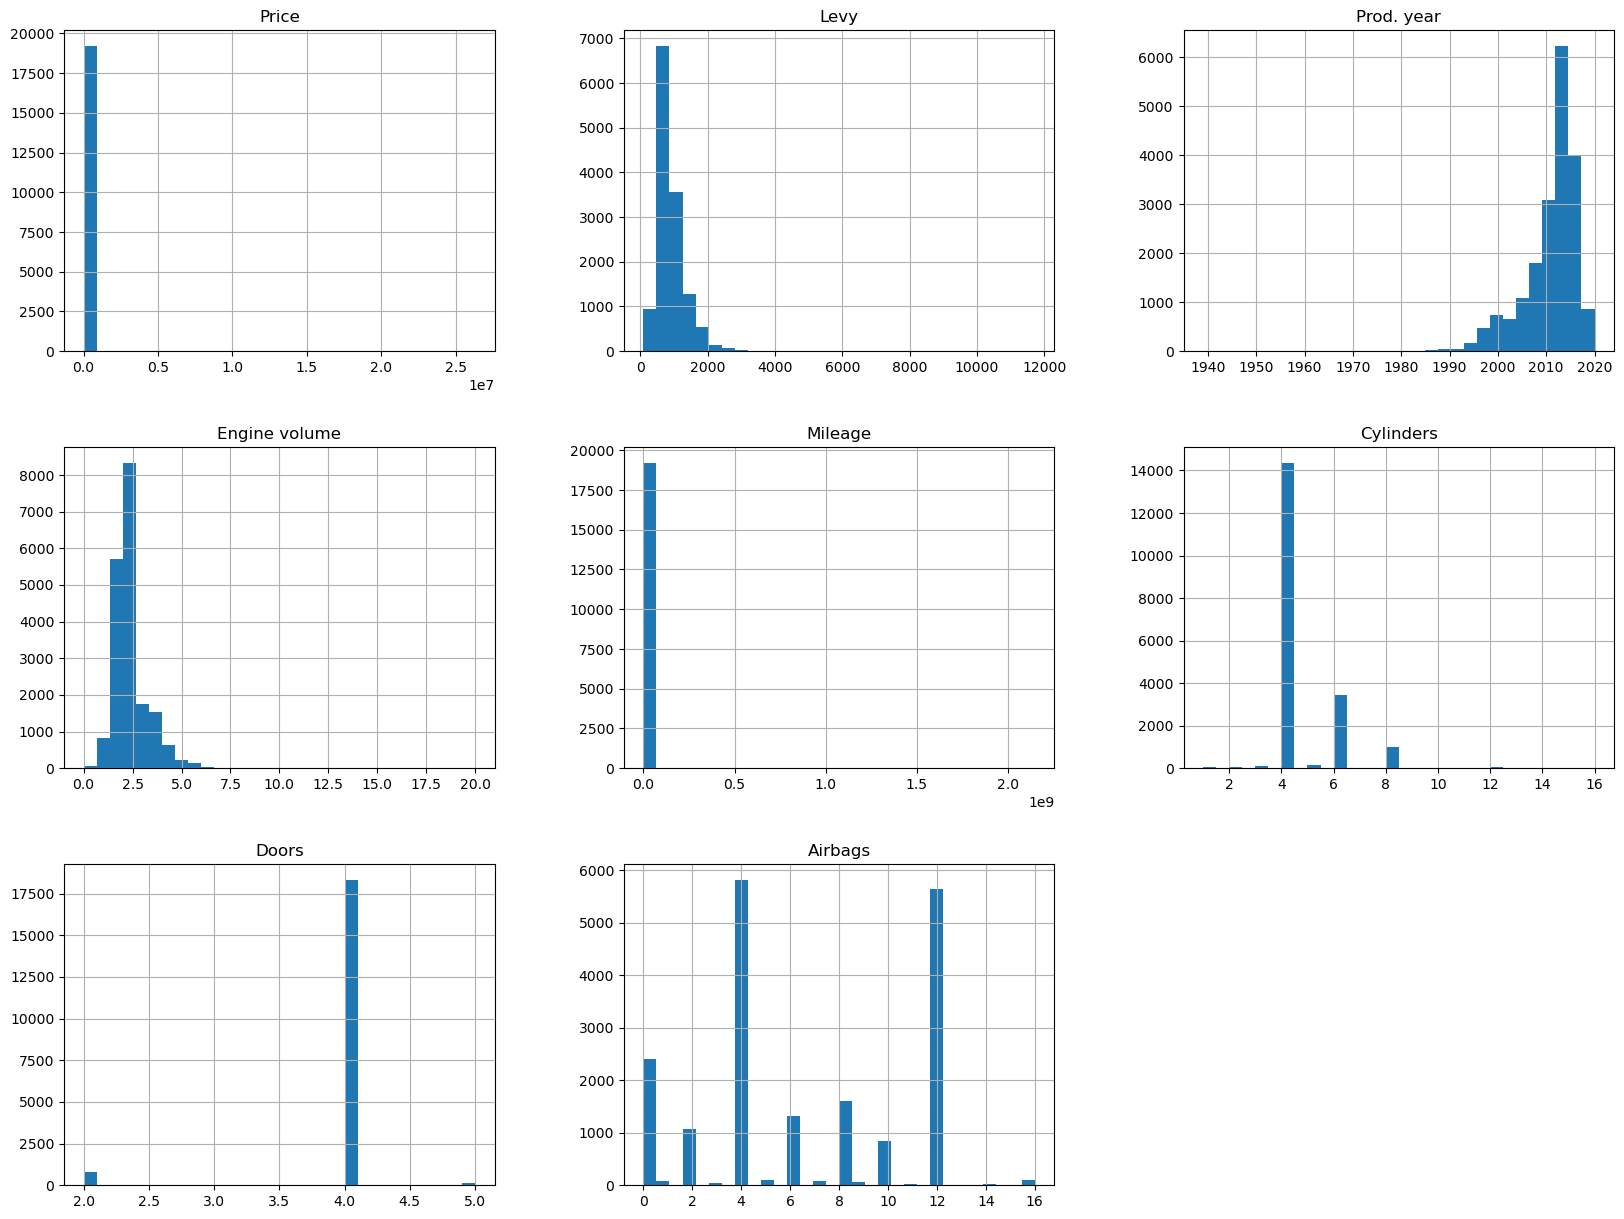

In [144]:
%matplotlib inline

data.hist(bins=30, figsize=(20,15))
plt.show()

In [145]:
##IQR range will be used as data doesn't follow normal distribution

In [146]:
def outliers_finder (data,features,boundary):
    outlier_indices = []
    
    for x in features:
        ## 1st quartile
        Q1 = np.percentile(data[x],25)
        ## 3rd quartile
        Q3 = np.percentile(data[x],75)
        ## IQR
        IQR = Q3 - Q1
        ## Outlier step
        outlier_step = IQR * boundary
        ## Detect outlier and their indices
        outlier_list_col = data[(data[x] < Q1 - outlier_step) | (data[x] > Q3 + outlier_step)].index
        # Store indices
        outlier_indices.extend(outlier_list_col)
    
    
    return outlier_indices

In [147]:
features = ['Price','Levy','Mileage']
outliers = outliers_finder(data, features, 1.5)

In [148]:
final_data = data.drop(data.loc[outliers].index, axis = 0)

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Levy'}>,
        <AxesSubplot:title={'center':'Prod. year'}>],
       [<AxesSubplot:title={'center':'Engine volume'}>,
        <AxesSubplot:title={'center':'Mileage'}>,
        <AxesSubplot:title={'center':'Cylinders'}>],
       [<AxesSubplot:title={'center':'Doors'}>,
        <AxesSubplot:title={'center':'Airbags'}>, <AxesSubplot:>]],
      dtype=object)

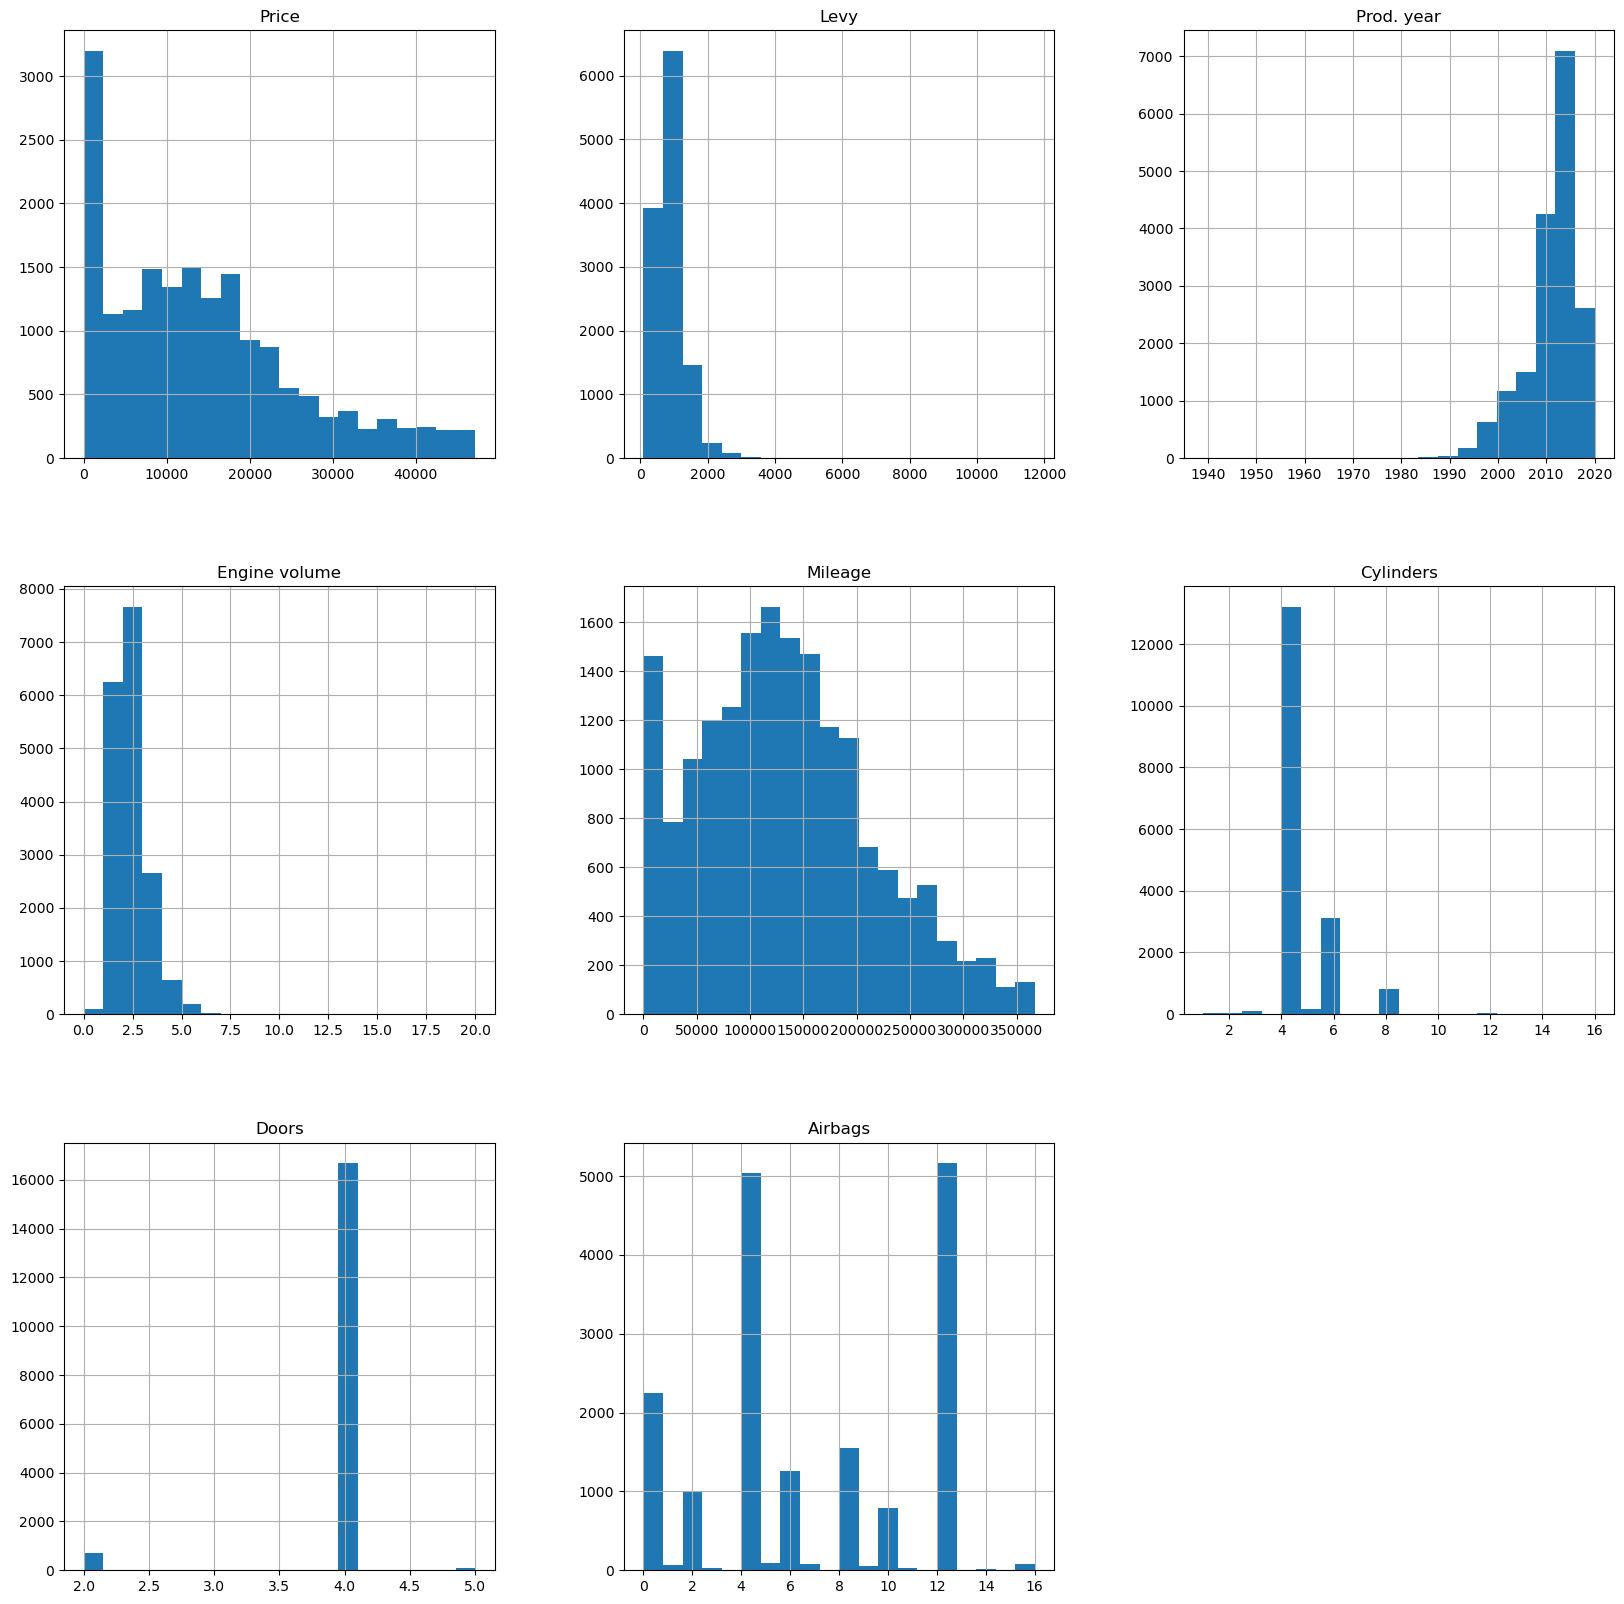

In [149]:
%matplotlib inline
final_data.hist(bins = 20, figsize = (20,20))

In [150]:
## Price, Levy, Mileage are positive distribution, Prod. year = negative distribution

In [151]:
final_data.corr()

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,Turbo
Price,1.000000,-0.063836,0.265071,0.077753,0.010460,-0.156126,-0.034800,0.026247,-0.067156,0.154488
Levy,-0.063836,1.000000,-0.267778,0.012371,0.641298,0.107557,0.591950,-0.074151,0.088489,-0.033025
Prod. year,0.265071,-0.267778,1.000000,0.377579,-0.043089,-0.223481,-0.113265,0.199044,0.258465,-0.090119
Leather interior,0.077753,0.012371,0.377579,1.000000,0.278070,0.015369,0.204257,0.101498,0.169564,-0.119448
Engine volume,0.010460,0.641298,-0.043089,0.278070,1.000000,0.188961,0.776385,-0.013201,0.227343,-0.050832
Mileage,-0.156126,0.107557,-0.223481,0.015369,0.188961,1.000000,0.163666,0.001358,-0.017948,0.014016
Cylinders,-0.034800,0.591950,-0.113265,0.204257,0.776385,0.163666,1.000000,-0.033818,0.171386,-0.008551
Doors,0.026247,-0.074151,0.199044,0.101498,-0.013201,0.001358,-0.033818,1.000000,0.052459,-0.090979
Airbags,-0.067156,0.088489,0.258465,0.169564,0.227343,-0.017948,0.171386,0.052459,1.000000,0.034470
Turbo,0.154488,-0.033025,-0.090119,-0.119448,-0.050832,0.014016,-0.008551,-0.090979,0.034470,1.000000


In [152]:
## Cylinders v Engine volume largest at 0.78, Engine volume and Levy 0.64, Cyliners v levy 0.59

In [153]:
## Fix null issues
## As levy is positively distributed, use median to fill in np.Nan

In [154]:
y = final_data['Price'].values

In [155]:
final_data['Levy'].replace({np.NaN : final_data['Levy'].median()}, inplace = True) 

In [89]:
## Scale and impute the numerical attributes

In [157]:
for col in final_data.select_dtypes('object').columns:
    le = LabelEncoder()
    final_data[col] = le.fit_transform(final_data[col])

In [158]:
final_data = final_data.drop(['Price', 'Color'], axis=1).values
X = MinMaxScaler().fit_transform(final_data)

In [ ]:
## Train Test Split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

In [160]:
## Model

In [161]:
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr)]

Linear Regression : 21 %
K Nearest Neighbours : 60 %
Decision Tree : 46 %
Random Forest : 75 %
AdaBoost : 36 %
Gradient Boosting Regressor : 73 %


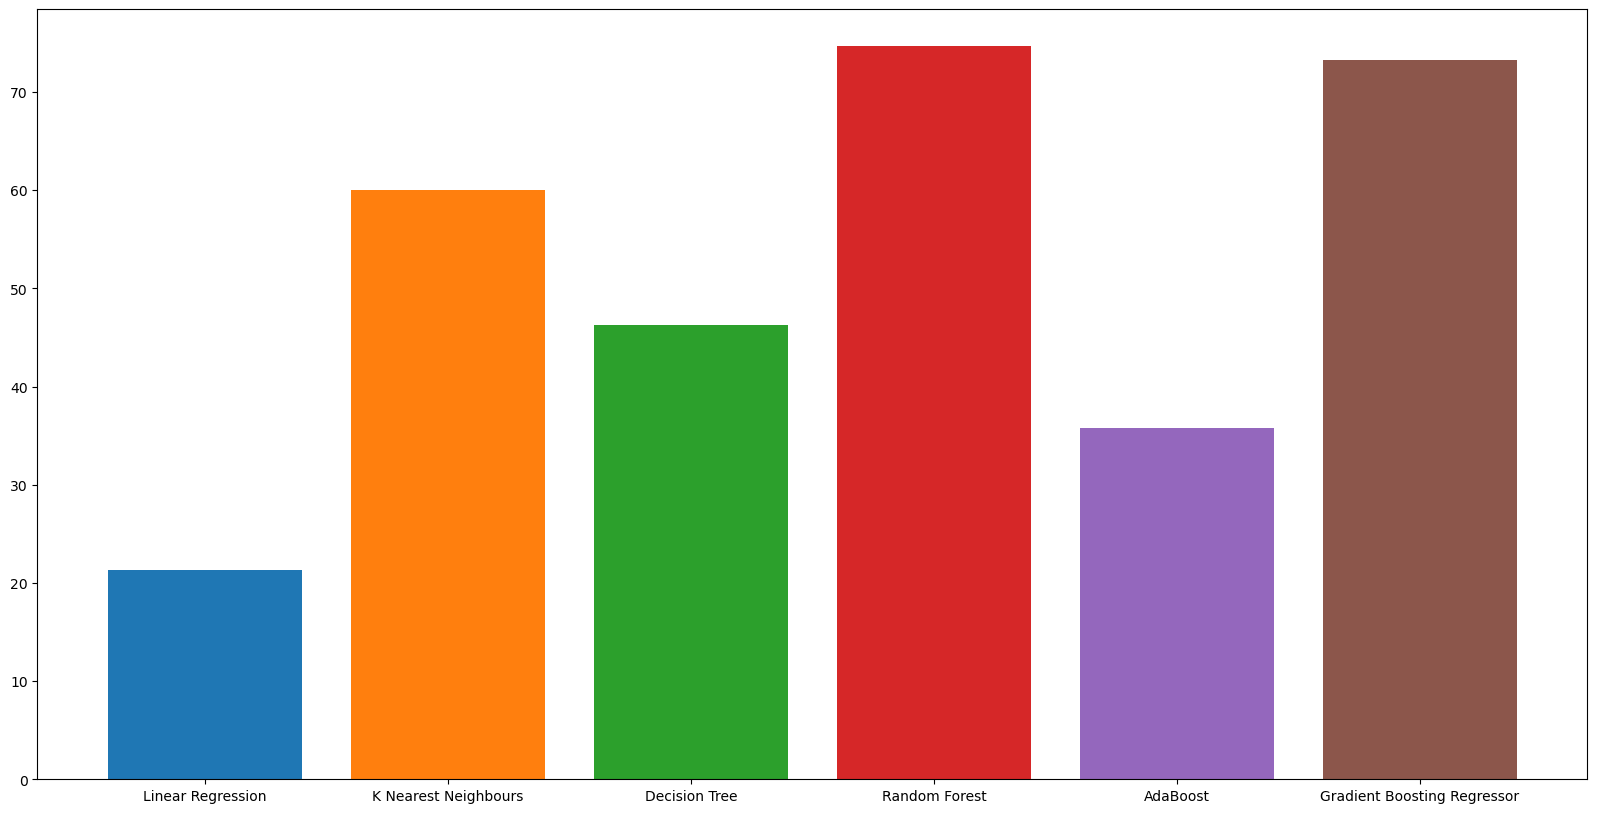

In [169]:
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,10)
    plt.bar(regressor_name,accuracy)

In [171]:
## Polynomial model

In [167]:
poly = PolynomialFeatures(degree=2)
X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.fit_transform(X_test)

Linear Regression : 43 %
K Nearest Neighbours : 60 %
Decision Tree : 48 %
Random Forest : 74 %
AdaBoost : 38 %
Gradient Boosting Regressor : 74 %


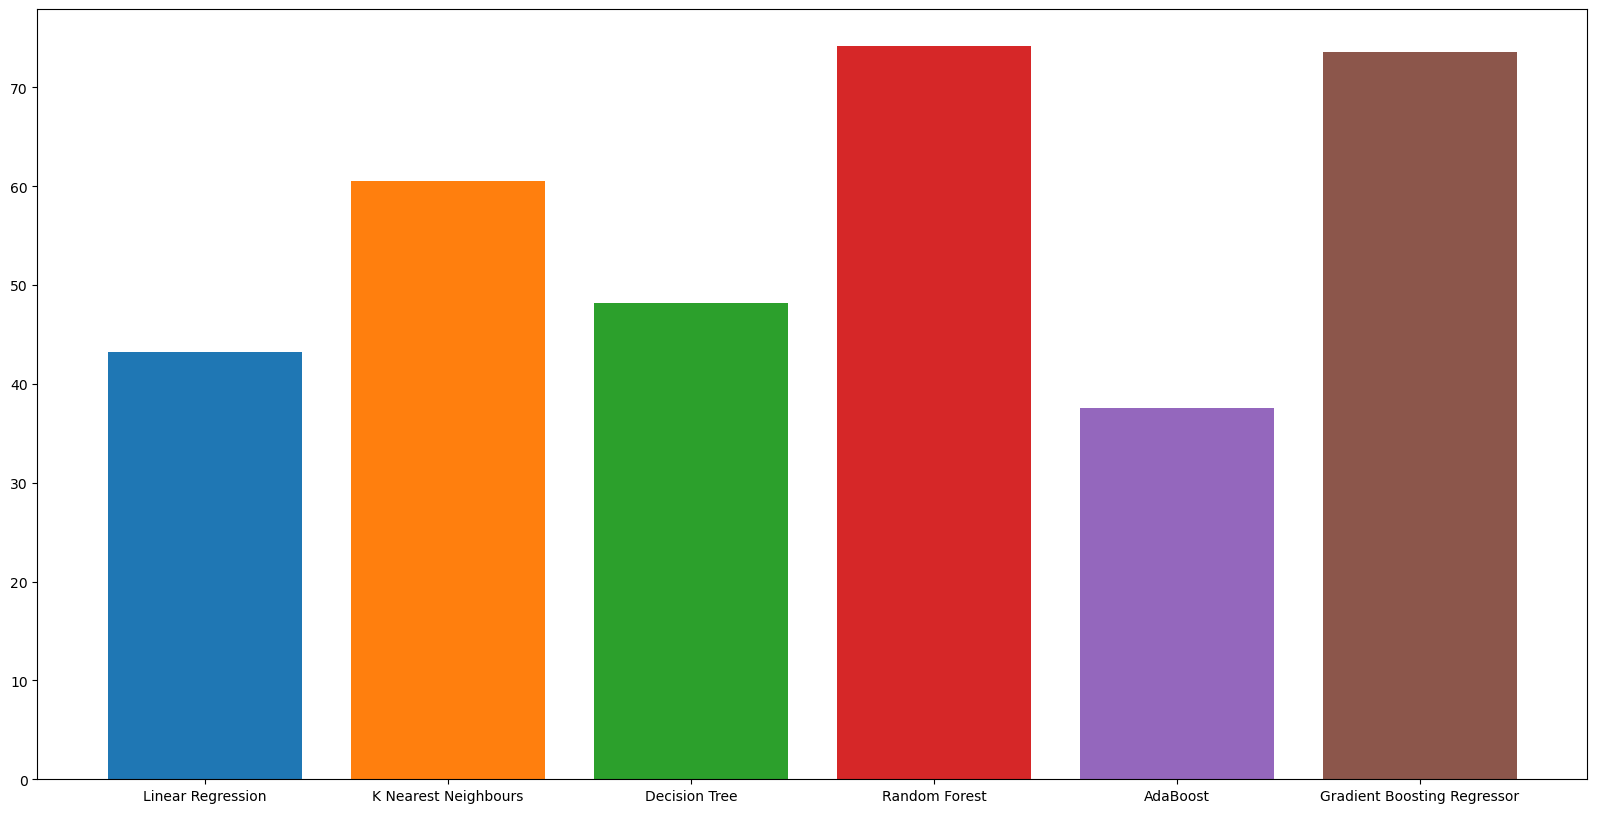

In [170]:
for regressor_name, regressor in regressors:

    regressor.fit(X_train_2, y_train)    
  
    y_pred = regressor.predict(X_test_2)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,10)
    plt.bar(regressor_name,accuracy)